tl;dr : *Crowd-sourcing raw scores for your COSYNE reviewer feedback.*

Following that message:

> Dear community, 

> COSYNE is a great conference which plays a pivotal role in our field. If you have submitted an abstract (or several) you have recently received your scores. I am not affiliated to COSYNE - yet willing to contribute in some way: I would like to ask one minute of your time to report the raw scores from your reviewers. I will summarize in a few lines the results in one week time (11/02). The more numerous your feedbacks the better their precision!

> Thanks!

As of today, I have received $N = 82$ anwsers from the [google form](https://forms.gle/hjzWVemM4Jy9cBbZ9) (out of them, $79$ are valid) out of the $881$ submitted_abstracts. In short, the total score is simply the linear sum of the scores relatively weighted by the confidence levels (as stated in the email we received from the chairs) and the threshold is close to $6.05$ this year:

![2022-02-11_COSYNE-razor](2022-02-11_COSYNE-razor.png)

More details in the [notebook](https://github.com/laurentperrinet/2022-02-11_COSYNE-scoresheet/blob/main/2022-02-11_COSYNE-scoresheet.ipynb) (or directly in this [post](https://laurentperrinet.github.io/sciblog/posts/2022-02-11-cosyne-reviewer-feedback.html)) which can also be [forked here](https://github.com/laurentperrinet/2022-02-11_COSYNE-scoresheet) and [interactively modified on binder](https://mybinder.org/v2/gh/laurentperrinet/2022-02-11_COSYNE-scoresheet/main?labpath=2022-02-11_COSYNE-scoresheet.ipynb).


<!-- TEASER_END -->


## importing data

The data was collected using a [Google form](https://forms.gle/n5wzU2WJ5E6n5X1E7) which thanks to a public link can be directly accessed to [pandas](pandas.pydata.org/):

In [1]:
import numpy as np
import pandas as pd
url = 'https://docs.google.com/spreadsheets/d/1F2ptf6mlwvV5jaAv6iQusFbDElTIjrXi-HhURmz8E_0/export?format=csv'
score_sheet = pd.read_csv(url)
score_sheet.tail()

,Horodateur,Reviewer #1 score,Reviewer #1 confidence,Reviewer #2 score,Reviewer #2 confidence,Reviewer #3 score,Reviewer #3 confidence,Abstract accepted?,Comments?
78,08/02/2022 16:20:22,2.0,4.0,8.0,5.0,5.0,4.0,No,NaN
79,09/02/2022 07:34:44,3.0,2.0,2.0,3.0,9.0,5.0,No,NaN
80,09/02/2022 09:08:29,7.0,4.0,4.0,3.0,4.0,5.0,No,NaN
81,09/02/2022 12:06:15,8.0,4.0,7.0,5.0,7.0,4.0,Yes,NaN
82,09/02/2022 13:48:58,7.0,5.0,8.0,3.0,8.0,4.0,Yes,NaN


First, thanks for the people leaving comments:

In [2]:
score_sheet[score_sheet['Comments?'].notna()]['Comments?']

2                                                    HL
3                                                    JN
19    Reviewer 1 was in a rush it seems to read the ...
29    Reviewer 2 had only a problem with the relevan...
42                            Thank you for this study!
45           huge spread in scores with high confidence
53    reviewers not familiar with the type of resear...
62                            Thank you for doing this!
Name: Comments?, dtype: object

Always useful, but let's leave it aside for the quantitative anlysis:

In [3]:
score_sheet = score_sheet.drop(['Comments?'], axis=1)
score_sheet.tail()

,Horodateur,Reviewer #1 score,Reviewer #1 confidence,Reviewer #2 score,Reviewer #2 confidence,Reviewer #3 score,Reviewer #3 confidence,Abstract accepted?
78,08/02/2022 16:20:22,2.0,4.0,8.0,5.0,5.0,4.0,No
79,09/02/2022 07:34:44,3.0,2.0,2.0,3.0,9.0,5.0,No
80,09/02/2022 09:08:29,7.0,4.0,4.0,3.0,4.0,5.0,No
81,09/02/2022 12:06:15,8.0,4.0,7.0,5.0,7.0,4.0,Yes
82,09/02/2022 13:48:58,7.0,5.0,8.0,3.0,8.0,4.0,Yes


A quick sanity check for missing data:

In [4]:
for i in [1, 2, 3]:
    print(score_sheet[score_sheet[f'Reviewer #{i} score'].isna()])
    print(score_sheet[score_sheet[f'Reviewer #{i} confidence'].isna()])    

             Horodateur  Reviewer #1 score  Reviewer #1 confidence  \
0   04/02/2022 08:54:01                NaN                     NaN   
9   04/02/2022 10:15:22                NaN                     4.0   
52  04/02/2022 20:16:41                NaN                     NaN   

    Reviewer #2 score  Reviewer #2 confidence  Reviewer #3 score  \
0                 NaN                     NaN                NaN   
9                 3.0                     3.0                4.0   
52                NaN                     NaN                NaN   

    Reviewer #3 confidence Abstract accepted?  
0                      NaN                NaN  
9                      4.0                 No  
52                     NaN                 No  
             Horodateur  Reviewer #1 score  Reviewer #1 confidence  \
0   04/02/2022 08:54:01                NaN                     NaN   
52  04/02/2022 20:16:41                NaN                     NaN   

    Reviewer #2 score  Reviewer #2 confiden

It seems we should remove lines `0`,  `9` and `52` to get a cleaner score-sheet and avoid overkill hacks. 

In [5]:
score_sheet = score_sheet.drop([0, 9, 52], axis=0)
score_sheet.head()

,Horodateur,Reviewer #1 score,Reviewer #1 confidence,Reviewer #2 score,Reviewer #2 confidence,Reviewer #3 score,Reviewer #3 confidence,Abstract accepted?
1,04/02/2022 09:14:56,3.0,4.0,5.0,1.0,4.0,3.0,No
2,04/02/2022 09:15:45,4.0,3.0,9.0,3.0,4.0,4.0,No
3,04/02/2022 09:24:01,5.0,4.0,2.0,5.0,2.0,4.0,No
4,04/02/2022 09:47:03,7.0,4.0,6.0,1.0,6.0,4.0,Yes
5,04/02/2022 09:49:27,8.0,4.0,8.0,3.0,4.0,3.0,Yes


Finally, the scores are integers and should be converted from the `float` format imported from google forms. 

In [6]:
for i in [1, 2, 3]:
    score_sheet[f'Reviewer #{i} score'] = score_sheet[f'Reviewer #{i} score'].astype(int)
    score_sheet[f'Reviewer #{i} confidence'] = score_sheet[f'Reviewer #{i} confidence'].astype(int)
score_sheet.head()

,Horodateur,Reviewer #1 score,Reviewer #1 confidence,Reviewer #2 score,Reviewer #2 confidence,Reviewer #3 score,Reviewer #3 confidence,Abstract accepted?
1,04/02/2022 09:14:56,3,4,5,1,4,3,No
2,04/02/2022 09:15:45,4,3,9,3,4,4,No
3,04/02/2022 09:24:01,5,4,2,5,2,4,No
4,04/02/2022 09:47:03,7,4,6,1,6,4,Yes
5,04/02/2022 09:49:27,8,4,8,3,4,3,Yes


## more data
The message received by `cosyne@confmaster.net` mentions some numbers:

In [7]:
reviewer_pool = 215
total_reviews = 2639 # out of 2643 - why is that number of 5 out of 2643 mentionned?
submitted_abstracts = 881

## analyzing raw scores

Now that we have all the date in hand, let's do a quick analysis.

In [8]:
import matplotlib.pyplot as plt

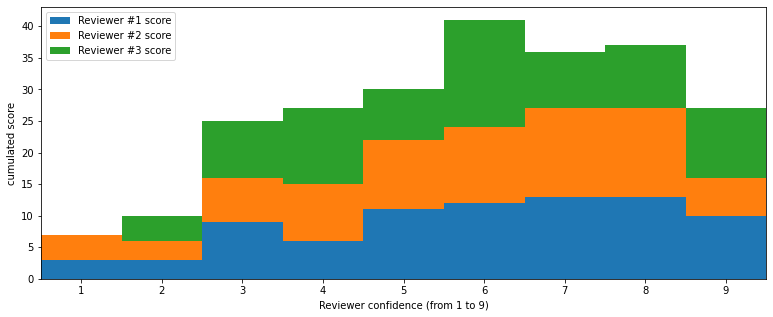

In [9]:
fig, ax = plt.subplots(figsize=(13, 5))
cols = ['Reviewer #1 score', 'Reviewer #2 score', 'Reviewer #3 score']
ax = score_sheet[cols].plot.hist(stacked=True, ax=ax, bins=9)
ax.set_xlabel('Reviewer confidence (from 1 to 9)')
ax.set_xlim(1, 10)
ax.set_xticks(np.arange(1, 10)+.5)
ax.set_xticklabels(np.arange(1, 10))
ax.set_ylabel('cumulated score');

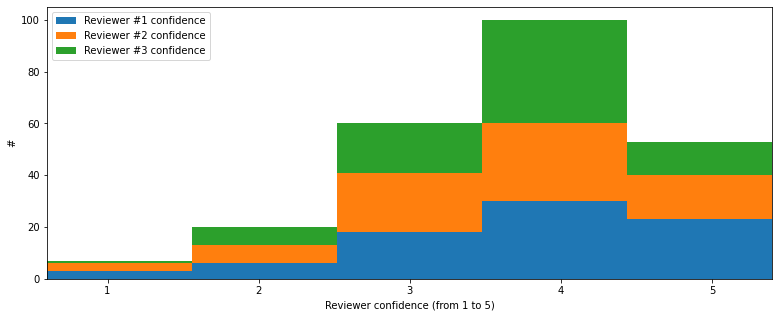

In [10]:
fig, ax = plt.subplots(figsize=(13, 5))
cols = ['Reviewer #1 confidence', 'Reviewer #2 confidence', 'Reviewer #3 confidence']
ax = score_sheet[cols].plot.hist(stacked=True, ax=ax, bins=5)
ax.set_xlabel('Reviewer confidence (from 1 to 5)')
ax.set_xlim(1, 5)
ax.set_xticks(np.arange(1, 6)*5/6+.5)
ax.set_xticklabels(np.arange(1, 6))
ax.set_ylabel('#');

In [11]:
accepted = score_sheet[score_sheet['Abstract accepted?']=='Yes']
print(f"Number of accepted abstracts = {len(accepted)}")

Number of accepted abstracts = 37


In [12]:
print(f"Percent of accepted abstracts in survey = {len(accepted)/len(score_sheet)*100:.1f}%")

Percent of accepted abstracts in survey = 46.2%


## retrieving the razor score

The message mentions the method:

    Each review comprised a short comment and a score between 1 and 10. Individual scores were weighed by a confidence factor and averaged for each submission.



This is my attempt at deriving a score:

In [13]:
p = 1 # trying out different norms... confidence=variance? confidence=std?
total_score = score_sheet['Reviewer #1 score'] * score_sheet['Reviewer #1 confidence']**p
total_score += score_sheet['Reviewer #2 score'] * score_sheet['Reviewer #2 confidence']**p
total_score += score_sheet['Reviewer #3 score'] * score_sheet['Reviewer #3 confidence']**p
total_weight = score_sheet['Reviewer #1 confidence']**p
total_weight += score_sheet['Reviewer #2 confidence']**p
total_weight += score_sheet['Reviewer #3 confidence']**p
score = total_score / total_weight

For which the histogram looks like:

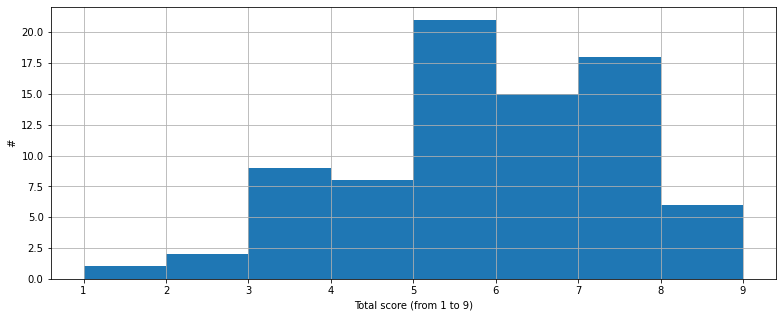

In [14]:
fig, ax = plt.subplots(figsize=(13, 5))
ax = score.hist(bins=np.arange(1, 10), ax=ax)
ax.set_xlabel('Total score (from 1 to 9)')
ax.set_ylabel('#');

While the sum of confidences is

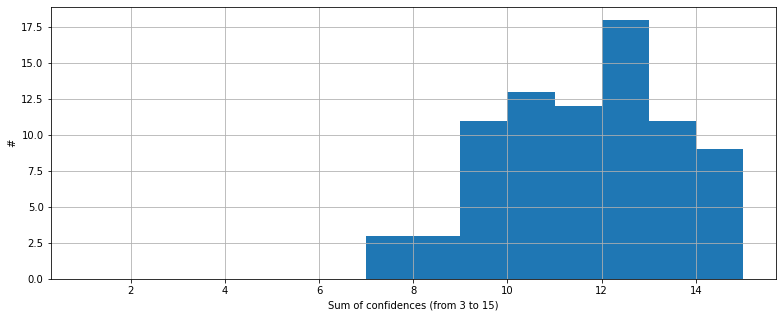

In [15]:
fig, ax = plt.subplots(figsize=(13, 5))
ax = total_weight.hist(bins=np.arange(1, 16), ax=ax)
ax.set_xlabel('Sum of confidences (from 3 to 15)')
ax.set_ylabel('#');

Let's scatter plot the outcome as a function of the score:

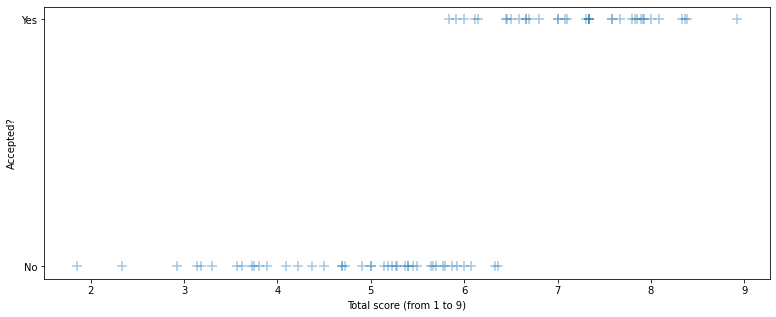

In [16]:
fig, ax = plt.subplots(figsize=(13, 5))
ax.scatter(score, score_sheet['Abstract accepted?']=='Yes', marker='+', alpha=.4, s=100)
ax.set_xlabel('Total score (from 1 to 9)')
ax.set_yticks(np.arange(0, 2))
ax.set_yticklabels(['No', 'Yes'])
ax.set_ylabel('Accepted?');

An (overkill) method would be to fit a [sigmoid](https://laurentperrinet.github.io/sciblog/posts/2020-04-08-fitting-a-psychometric-curve-using-pytorch.html)... Let's rather look at the threshold:

It was mentioned in the message that:

    After considering additional constraining factors, the top scoring 54 % of submissions were accepted.
    

In [17]:
score_quantile = .54

print(f"Official percent of accepted abstracts = {score_quantile*100:.1f}%")

Official percent of accepted abstracts = 54.0%


In [18]:
threshold = score.quantile(score_quantile)
print(f"threshold score for an accepted abstract {threshold:.3f}")

threshold score for an accepted abstract 6.051


In [19]:
false_negatives = score[(score > threshold) & (score_sheet['Abstract accepted?']=='No')]
print(f"Abstracts rejected above the threshold = {len(false_negatives)}")

Abstracts rejected above the threshold = 3


In [20]:
false_positives = score[(score < threshold) & (score_sheet['Abstract accepted?']=='Yes')]
print(f"Abstracts accepted below the threshold = {len(false_negatives)}")

Abstracts accepted below the threshold = 3


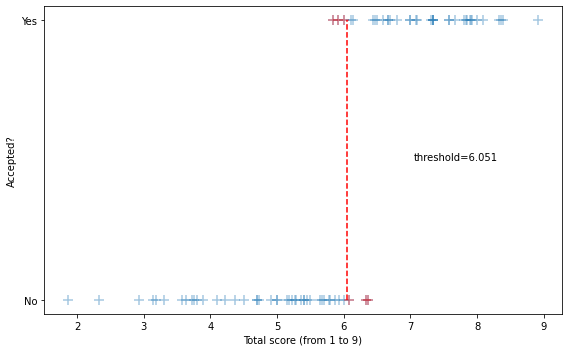

In [21]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(score, score_sheet['Abstract accepted?']=='Yes', marker='+', alpha=.4, s=100)
ax.scatter(false_positives, np.ones_like(false_negatives), marker='+', alpha=.4, s=100, c='r')
ax.scatter(false_negatives, np.zeros_like(false_negatives), marker='+', alpha=.4, s=100, c='r')
ax.vlines([threshold], ymin=.0, ymax=1., colors='r', linestyles='--')
ax.set_xlabel('Total score (from 1 to 9)')
ax.set_yticks(np.arange(0, 2))
ax.set_yticklabels(['No', 'Yes'])
ax.text(threshold + 1, .5, f'{threshold=:.3f}')
ax.set_ylabel('Accepted?')
plt.tight_layout();

In [22]:
fig.savefig('2022-02-11_COSYNE-razor.png')

This result may be (certainly) due to an error in reporting the score in the google form or to the "additional constraining factors" mentioned in:

    After considering additional constraining factors, the top scoring 54 % of submissions were accepted.


## gray zone

It seems there is a "gray zone" for abstracts that were between the minimal score for accepted abstracts and the maximal score for rejected ones:

In [23]:
score_min = score[score_sheet['Abstract accepted?']=='Yes'].min()
print(f"Minimal score for an accepted abstract {score_min:.3f}")

Minimal score for an accepted abstract 5.833


In [24]:
score_max = score[score_sheet['Abstract accepted?']=='No'].max()
print(f"Maximal score for a rejected abstract {score_max:.3f}")

Maximal score for a rejected abstract 6.357


In [25]:
gray_zone = score[(score_min < score) & ( score < score_max)]
print(f"Abstracts in gray zone {len(gray_zone)}")

Abstracts in gray zone 9


In [26]:
print(f"Percent abstracts in gray zone = {len(gray_zone)/len(score)*100:.1f}%")

Percent abstracts in gray zone = 11.2%


In [27]:
print(f"Predicted total abstracts in gray zone = {int(len(gray_zone)/len(score)*submitted_abstracts)}")

Predicted total abstracts in gray zone = 99


Out of the total of $881$ abstract, it is certainly worth to put more attention at these $100$ abstracts which are closer to the threshold. Considering that these are certainly the ones that are less likely to go to such a conference (students, minorities, lower-ranked universities) it is an important issue to better consider their scientific value.

## bonus: reliability of score for individual abstracts across reviewers 


Similarly to that [tweed by Sdrjan Ostojic](https://twitter.com/jmourabarbosa/status/1488432239692107778) I also looked at a dependance between reviewers scores, but this is still in progress. Any help is welcome (you can [fork](https://github.com/laurentperrinet/2022-02-11_COSYNE-scoresheet) the notebook).

In [28]:
import seaborn as sns
opts = dict(kind="reg", scatter_kws=dict(alpha=.3, s=100))

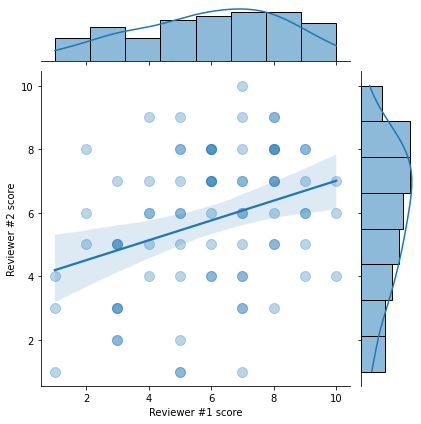

In [29]:
sns.jointplot(data=score_sheet, x='Reviewer #1 score', y='Reviewer #2 score', **opts)

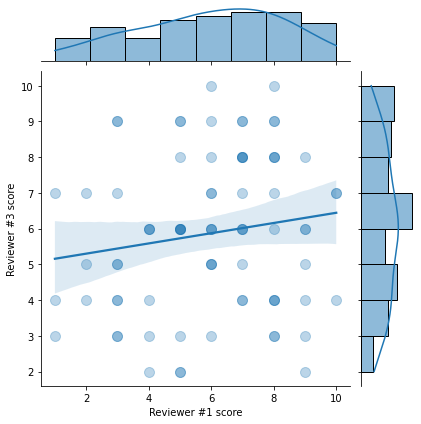

In [30]:
sns.jointplot(data=score_sheet, x='Reviewer #1 score', y='Reviewer #3 score', **opts);

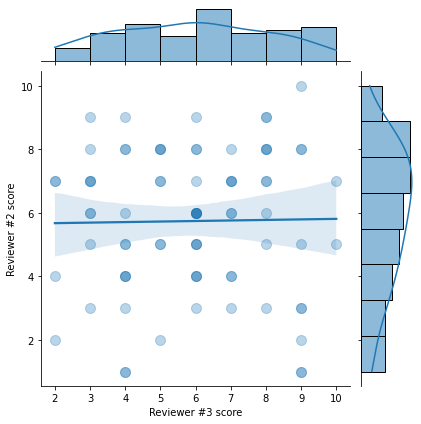

In [31]:
sns.jointplot(data=score_sheet, x='Reviewer #3 score', y='Reviewer #2 score', **opts);

## dependance of score and confidence


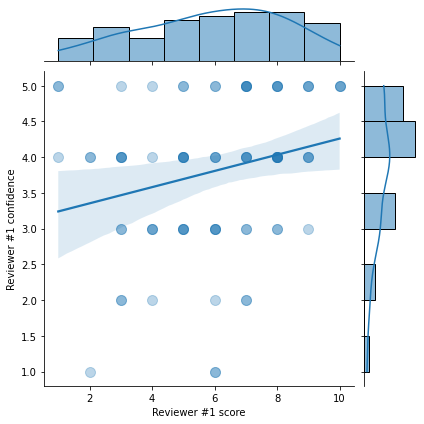

In [32]:
sns.jointplot(data=score_sheet, x='Reviewer #1 score', y='Reviewer #1 confidence', **opts);

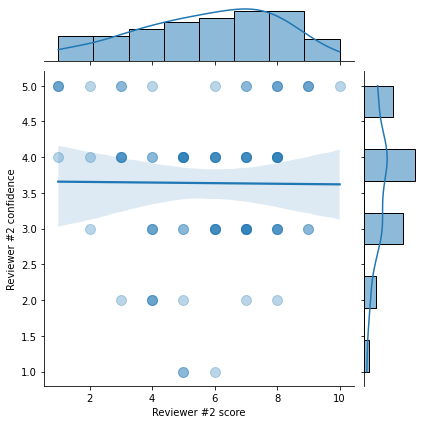

In [33]:
sns.jointplot(data=score_sheet, x='Reviewer #2 score', y='Reviewer #2 confidence', **opts);

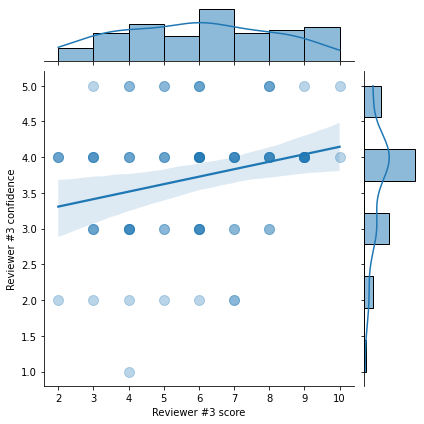

In [34]:
sns.jointplot(data=score_sheet, x='Reviewer #3 score', y='Reviewer #3 confidence', **opts);

Other resources I found:

- https://neuroecology.wordpress.com/2020/02/27/cosyne2020-by-the-numbers/ 
- https://charlesfrye.github.io/stats/2019/03/06/cosyne19-gender-bias.html : on gender balance